# Importações

In [44]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import requests
import pandas as pd
import sqlite3

# Download dos dados

In [40]:
# URL base para os datasets
base_url = 'https://storage.googleapis.com/covid19-open-data/v3/'

# Lista de arquivos CSV
file_list = [
    "vaccinations.csv",
    "index.csv",
    "epidemiology.csv",
    "demographics.csv",
    "economy.csv",
    "health.csv",
    "geography.csv",
    "mobility.csv",
    "weather.csv",
    "hospitalizations.csv"
]

# Diretório destino
base_dir = "Data"

try:
    # Verifica se o diretório existe, caso contrário, cria o diretório.
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
        print(f"Diretório {base_dir} criado.")
    else:
        print(f"Diretório {base_dir} já existe.")

    # Faz o download dos arquivos
    for file in file_list:
        file_path_url = base_url + file
        file_path_download = os.path.join(base_dir, file)

        # Verifica se o arquivo já existe
        if os.path.exists(file_path_download):
            file_size = os.path.getsize(file_path_download)
            print(f"Arquivo {file} já existe. Tamanho: {file_size} bytes.")
        else:
            print(f"Baixando {file}...")
            response = requests.get(file_path_url)
            response.raise_for_status()  # Verifica se houve erro no download

            # Salva o arquivo no diretório especificado
            with open(file_path_download, 'wb') as f:
                f.write(response.content)
            print(f"Arquivo {file} salvo em: {file_path_download}")

except requests.exceptions.HTTPError as errh:
    print(f"Erro HTTP: {errh}")
except requests.exceptions.ConnectionError as errc:
    print(f"Erro de Conexão: {errc}")
except requests.exceptions.Timeout as errt:
    print(f"Timeout: {errt}")
except requests.exceptions.RequestException as err:
    print(f"Erro ao fazer o download: {err}")
except Exception as e:
    print(f"Erro inesperado: {e}")

Diretório Data já existe.
Arquivo vaccinations.csv já existe. Tamanho: 164305510 bytes.
Arquivo index.csv já existe. Tamanho: 2426323 bytes.
Arquivo epidemiology.csv já existe. Tamanho: 520931512 bytes.
Arquivo demographics.csv já existe. Tamanho: 1544607 bytes.
Arquivo economy.csv já existe. Tamanho: 10228 bytes.
Arquivo health.csv já existe. Tamanho: 122072 bytes.
Arquivo geography.csv já existe. Tamanho: 1005065 bytes.
Arquivo mobility.csv já existe. Tamanho: 234579795 bytes.
Arquivo weather.csv já existe. Tamanho: 1686450111 bytes.
Arquivo hospitalizations.csv já existe. Tamanho: 66428667 bytes.


# Exploração dos Dados

In [41]:
# Ler os arquivos CSV
index_df = pd.read_csv(os.path.join(base_dir, 'index.csv'))
vaccinations_df = pd.read_csv(os.path.join(base_dir, 'vaccinations.csv'))
epidemiology_df = pd.read_csv(os.path.join(base_dir, 'epidemiology.csv'))
demographics_df = pd.read_csv(os.path.join(base_dir, 'demographics.csv'))
economy_df = pd.read_csv(os.path.join(base_dir, 'economy.csv'))
health_df = pd.read_csv(os.path.join(base_dir, 'health.csv'))
geography_df = pd.read_csv(os.path.join(base_dir, 'geography.csv'))
mobility_df = pd.read_csv(os.path.join(base_dir, 'mobility.csv'))
weather_df = pd.read_csv(os.path.join(base_dir, 'weather.csv'))
hospitalizations_df = pd.read_csv(os.path.join(base_dir, 'hospitalizations.csv'))

## epidemiology_df

In [42]:
epidemiology_df.head(10)

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
0,2020-01-01,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,2020-01-02,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
2,2020-01-03,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
3,2020-01-04,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
4,2020-01-05,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
5,2020-01-06,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
6,2020-01-07,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7,2020-01-08,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
8,2020-01-09,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
9,2020-01-10,AD,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN


In [47]:
epidemiology_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525825 entries, 0 to 12525824
Data columns (total 10 columns):
 #   Column                Dtype         
---  ------                -----         
 0   date                  datetime64[ns]
 1   location_key          object        
 2   new_confirmed         float64       
 3   new_deceased          float64       
 4   new_recovered         float64       
 5   new_tested            float64       
 6   cumulative_confirmed  float64       
 7   cumulative_deceased   float64       
 8   cumulative_recovered  float64       
 9   cumulative_tested     float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 955.6+ MB


### Ajustes de tipo de dados

In [44]:
epidemiology_df['location_key'] = epidemiology_df['location_key'].astype(str) # Converter para string
epidemiology_df['date'] = pd.to_datetime(epidemiology_df['date']) # Converter para datetime

In [46]:
epidemiology_descriptive_analysis = epidemiology_df.describe()
print(epidemiology_descriptive_analysis)

                                date  new_confirmed  new_deceased  \
count                       12525825   1.247580e+07  1.166714e+07   
mean   2021-05-27 09:09:11.003419136   1.111905e+02  1.274817e+00   
min              2019-12-31 00:00:00  -5.045418e+06 -6.381100e+04   
25%              2020-10-29 00:00:00   0.000000e+00  0.000000e+00   
50%              2021-05-22 00:00:00   1.000000e+00  0.000000e+00   
75%              2021-12-24 00:00:00   1.100000e+01  0.000000e+00   
max              2022-12-30 00:00:00   5.047094e+06  6.383000e+04   
std                              NaN   1.165983e+04  8.808127e+01   

       new_recovered    new_tested  cumulative_confirmed  cumulative_deceased  \
count   3.980462e+06  3.194489e+06          1.232704e+07         1.147482e+07   
mean    2.104549e+02  2.509508e+03          3.539969e+04         5.874310e+02   
min    -1.001683e+07 -3.541552e+08          0.000000e+00         0.000000e+00   
25%     0.000000e+00  1.000000e+00          2.020000e+

### Resultados para BR

In [48]:
# Exibir os valores em uma lista
epidemiology_df['location_key'] = epidemiology_df['location_key'].tolist() # Converter para lista

print(epidemiology_df['location_key'])


0           AD
1           AD
2           AD
3           AD
4           AD
            ..
12525820    ZW
12525821    ZW
12525822    ZW
12525823    ZW
12525824    ZW
Name: location_key, Length: 12525825, dtype: object


In [49]:
# Filtrar apenas os valores que começam com "BR_"
br_location_key_df = epidemiology_df[epidemiology_df['location_key'].apply(lambda x: len(x) == 5 and x.startswith("BR_"))]

# Exibir o resultado
print(br_location_key_df)


              date location_key  new_confirmed  new_deceased  new_recovered  \
574646  2020-01-01        BR_AC            1.0           NaN            0.0   
574647  2020-01-02        BR_AC            4.0           NaN            0.0   
574648  2020-01-03        BR_AC            1.0           NaN            0.0   
574649  2020-01-04        BR_AC            7.0           NaN            0.0   
574650  2020-01-05        BR_AC            1.0           NaN            0.0   
...            ...          ...            ...           ...            ...   
5540250 2022-09-11        BR_TO            0.0           0.0            NaN   
5540251 2022-09-12        BR_TO          117.0           1.0            NaN   
5540252 2022-09-13        BR_TO           25.0           0.0            NaN   
5540253 2022-09-14        BR_TO           42.0           3.0            NaN   
5540254 2022-09-15        BR_TO           40.0           1.0            NaN   

         new_tested  cumulative_confirmed  cumulati

In [87]:
br_location_key_df['location_key'].unique()

array(['BR_AC', 'BR_AL', 'BR_AM', 'BR_AP', 'BR_BA', 'BR_CE', 'BR_DF',
       'BR_ES', 'BR_GO', 'BR_MA', 'BR_MG', 'BR_MS', 'BR_MT', 'BR_PA',
       'BR_PB', 'BR_PE', 'BR_PI', 'BR_PR', 'BR_RJ', 'BR_RN', 'BR_RO',
       'BR_RR', 'BR_RS', 'BR_SC', 'BR_SE', 'BR_SP', 'BR_TO'], dtype=object)

In [54]:
# Agrupamento por 'location_key' aplicando funções de agregação
br_aggreg_df = br_location_key_df.groupby('location_key').agg(
    total_new_confirmed = ('new_confirmed', 'sum'),        # Soma de novos casos confirmados
    mean_new_confirmed  = ('new_deceased', 'mean'),        # Média de novos óbitos
    max_new_tested      = ('new_tested', 'max')            # Máximo de novos recuperados
).reset_index()

print(br_aggreg_df)

   location_key  total_new_confirmed  mean_new_confirmed  max_new_tested
0         BR_AC             149583.0            2.172377          1493.0
1         BR_AL             320941.0            7.624197          2884.0
2         BR_AM             615850.0           15.324411          7007.0
3         BR_AP             178262.0            2.311563          1415.0
4         BR_BA            1692651.0           32.853319         14051.0
5         BR_CE            1383350.0           29.574946         10512.0
6         BR_DF             838528.0           12.660600          3024.0
7         BR_ES            1215275.0           15.856531         14062.0
8         BR_GO            1691630.0           29.453961         11295.0
9         BR_MA             470668.0           11.766595          5892.0
10        BR_MG            3878299.0           68.204497         26509.0
11        BR_MS             579835.0           11.587794          7165.0
12        BR_MT             828716.0           15.9

### Resultados para Rio de Janeiro

In [56]:
epidemiology_df[epidemiology_df['location_key']  == 'BR_RJ'].head(10)

,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested
3854617,2020-01-01,BR_RJ,10.0,NaN,0.0,40.0,10.0,NaN,0.0,40.0
3854618,2020-01-02,BR_RJ,46.0,NaN,0.0,118.0,56.0,NaN,0.0,158.0
3854619,2020-01-03,BR_RJ,19.0,NaN,0.0,53.0,75.0,NaN,0.0,211.0
3854620,2020-01-04,BR_RJ,129.0,NaN,0.0,346.0,204.0,NaN,0.0,557.0
3854621,2020-01-05,BR_RJ,74.0,NaN,0.0,258.0,278.0,NaN,0.0,815.0
3854622,2020-01-06,BR_RJ,66.0,NaN,0.0,191.0,344.0,NaN,0.0,1006.0
3854623,2020-01-07,BR_RJ,36.0,NaN,0.0,116.0,380.0,NaN,0.0,1122.0
3854624,2020-01-08,BR_RJ,36.0,NaN,0.0,89.0,416.0,NaN,0.0,1211.0
3854625,2020-01-09,BR_RJ,11.0,NaN,0.0,33.0,427.0,NaN,0.0,1244.0
3854626,2020-01-10,BR_RJ,6.0,NaN,0.0,22.0,433.0,NaN,0.0,1266.0


In [59]:
brrj_epidemiology_na_df = epidemiology_df.columns[epidemiology_df.isna().all()].tolist()
print(brrj_epidemiology_na_df)

[]


### Séries Temporais

In [60]:
import matplotlib.pyplot as plt

In [90]:
# Filtrar dados para uma localização específica (ex: BR_RJ)
br_rj_epidemiology_df = epidemiology_df[epidemiology_df['location_key'] == 'BR_RJ'].drop(columns=['location_key']).drop(columns=['cumulative_recovered']).drop(columns=['new_recovered']).dropna()
print(br_rj_epidemiology_df)

              date  new_confirmed  new_deceased  new_tested  \
3854672 2020-02-25            0.0           0.0        22.0   
3854673 2020-02-26            0.0           0.0        24.0   
3854674 2020-02-27            0.0           0.0        18.0   
3854675 2020-02-28            0.0           0.0        24.0   
3854676 2020-02-29            0.0           0.0         7.0   
...            ...            ...           ...         ...   
3855230 2021-09-05          941.0          92.0         3.0   
3855231 2021-09-06          334.0           9.0        20.0   
3855232 2021-09-07         2098.0          69.0         5.0   
3855234 2021-09-09        17736.0         191.0         2.0   
3855235 2021-09-10          250.0          96.0         2.0   

         cumulative_confirmed  cumulative_deceased  cumulative_tested  
3854672                   0.0                  0.0             2470.0  
3854673                   0.0                  0.0             2494.0  
3854674                   0

In [ ]:
(br_rj_epidemiology_df['new_recovered'] == 0).all()

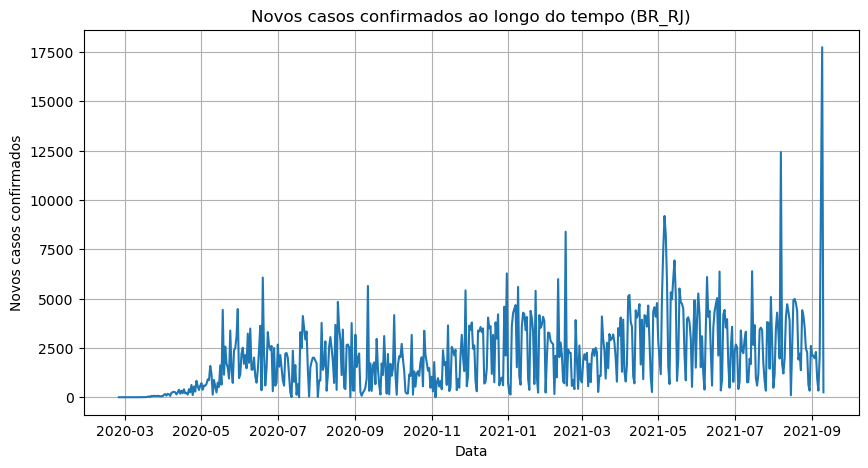

In [ ]:
# Plotar novos casos confirmados ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(br_rj_epidemiology_df['date'], br_rj_epidemiology_df['new_confirmed'])
plt.title('Novos casos confirmados ao longo do tempo (BR_RJ)')
plt.xlabel('Data')
plt.ylabel('Novos casos confirmados')
plt.grid()
plt.show()

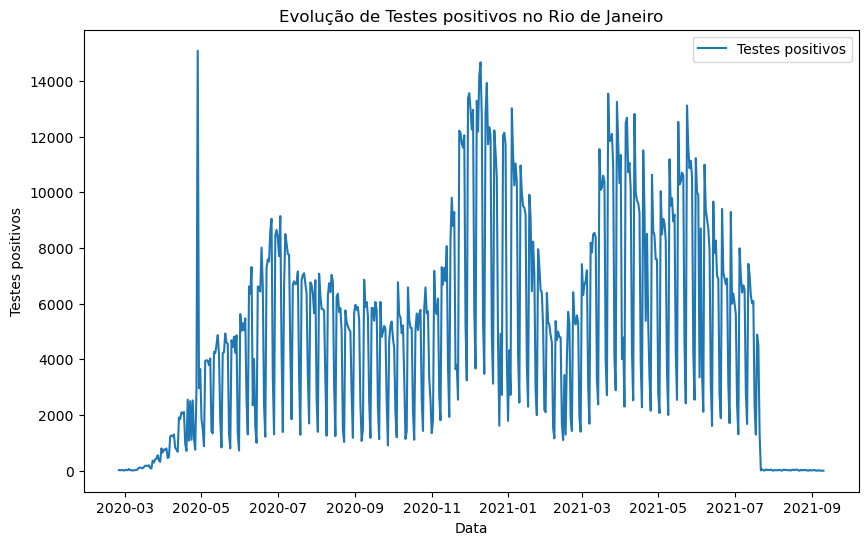

In [92]:
# Plotar casos recuperados ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(br_rj_epidemiology_df['date'], br_rj_epidemiology_df['new_tested'], label='Testes positivos')
plt.xlabel('Data')
plt.ylabel('Testes positivos')
plt.title('Evolução de Testes positivos no Rio de Janeiro')
plt.legend()
plt.show()

### Correlação

In [69]:
import seaborn as sns

In [93]:
correlative = br_rj_epidemiology_df.select_dtypes(include=['float64', 'int64'])
correlative = correlative.corr()

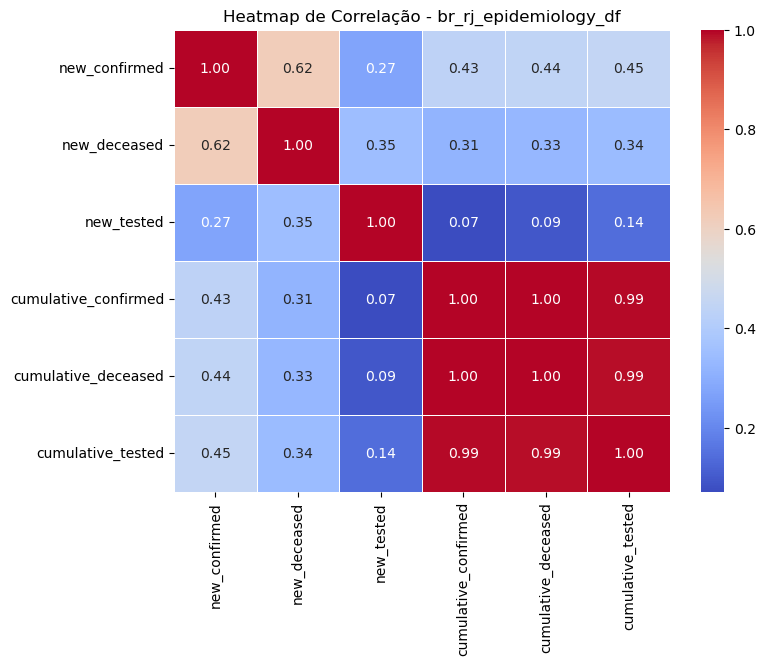

In [94]:
# Criar o heatmap
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
sns.heatmap(correlative, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap de Correlação - br_rj_epidemiology_df')
plt.show()

## vaccinations_df

In [77]:
vaccinations_df.head(10)

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
0,2021-01-25,AD,NaN,576.0,NaN,NaN,NaN,576.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-02-01,AD,460.0,1036.0,NaN,NaN,460.0,1036.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-02-10,AD,255.0,1291.0,NaN,NaN,255.0,1291.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-02-12,AD,331.0,1622.0,NaN,NaN,331.0,1622.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-02-19,AD,519.0,2141.0,NaN,NaN,519.0,2141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-02-24,AD,249.0,2390.0,NaN,NaN,249.0,2390.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-02-26,AD,0.0,NaN,NaN,NaN,136.0,2526.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-03-08,AD,49.0,2439.0,NaN,1172.0,1085.0,3611.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-03-10,AD,1211.0,3650.0,92.0,1264.0,1303.0,4914.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-03-15,AD,3448.0,7098.0,1.0,1265.0,3449.0,8363.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545118 entries, 0 to 2545117
Data columns (total 32 columns):
 #   Column                                         Dtype         
---  ------                                         -----         
 0   date                                           datetime64[ns]
 1   location_key                                   object        
 2   new_persons_vaccinated                         float64       
 3   cumulative_persons_vaccinated                  float64       
 4   new_persons_fully_vaccinated                   float64       
 5   cumulative_persons_fully_vaccinated            float64       
 6   new_vaccine_doses_administered                 float64       
 7   cumulative_vaccine_doses_administered          float64       
 8   new_persons_vaccinated_pfizer                  float64       
 9   cumulative_persons_vaccinated_pfizer           float64       
 10  new_persons_fully_vaccinated_pfizer            float64       
 11  cumulative_

## Ajustes de Tipo de Dados

In [79]:
vaccinations_df['location_key'] = vaccinations_df['location_key'].astype(str) # Converter para string
vaccinations_df['date'] = pd.to_datetime(vaccinations_df['date']) # Converter para datetime

In [81]:
vaccinations_descriptive_analysis = vaccinations_df.describe()
print(vaccinations_descriptive_analysis)

                                date  new_persons_vaccinated  \
count                        2545118            9.328870e+05   
mean   2021-11-12 19:15:30.561804032            8.055676e+03   
min              2020-01-25 00:00:00           -9.410506e+06   
25%              2021-07-13 00:00:00            0.000000e+00   
50%              2021-11-19 00:00:00            1.400000e+01   
75%              2022-04-01 00:00:00            1.900000e+02   
max              2022-09-16 00:00:00            4.505000e+08   
std                              NaN            5.126424e+05   

       cumulative_persons_vaccinated  new_persons_fully_vaccinated  \
count                   8.869040e+05                  2.525467e+06   
mean                    1.865078e+06                  2.479000e+03   
min                     0.000000e+00                 -6.867191e+06   
25%                     3.703000e+03                  0.000000e+00   
50%                     2.253600e+04                  3.000000e+00   
75%

### Resultados para BR

In [82]:
# Exibir os valores em uma lista
vaccinations_df['location_key'] = vaccinations_df['location_key'].tolist() # Converter para lista

print(vaccinations_df['location_key'])

0          AD
1          AD
2          AD
3          AD
4          AD
           ..
2545113    ZW
2545114    ZW
2545115    ZW
2545116    ZW
2545117    ZW
Name: location_key, Length: 2545118, dtype: object


In [85]:
# Filtrar apenas os valores que começam com "BR_"
br_vaccinations_df = vaccinations_df[vaccinations_df['location_key'].apply(lambda x: len(x) == 5 and x.startswith("BR_"))]

# Exibir o resultado
br_vaccinations_df.head(10)


,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
252706,2020-03-17,BR_AC,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252707,2020-03-18,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252708,2020-03-19,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252709,2020-03-20,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252710,2020-03-21,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252711,2020-03-22,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252712,2020-03-23,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252713,2020-03-24,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252714,2020-03-25,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252715,2020-03-26,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
br_location_key = br_location_key_df['location_key'].unique().tolist()
br_vaccinations_df = br_vaccinations_df[br_vaccinations_df['location_key'].isin(br_location_key)]
br_vaccinations_df.head(10)

,date,location_key,new_persons_vaccinated,cumulative_persons_vaccinated,new_persons_fully_vaccinated,cumulative_persons_fully_vaccinated,new_vaccine_doses_administered,cumulative_vaccine_doses_administered,new_persons_vaccinated_pfizer,cumulative_persons_vaccinated_pfizer,...,new_persons_fully_vaccinated_janssen,cumulative_persons_fully_vaccinated_janssen,new_vaccine_doses_administered_janssen,cumulative_vaccine_doses_administered_janssen,new_persons_vaccinated_sinovac,total_persons_vaccinated_sinovac,new_persons_fully_vaccinated_sinovac,total_persons_fully_vaccinated_sinovac,new_vaccine_doses_administered_sinovac,total_vaccine_doses_administered_sinovac
252706,2020-03-17,BR_AC,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252707,2020-03-18,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252708,2020-03-19,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252709,2020-03-20,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252710,2020-03-21,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252711,2020-03-22,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252712,2020-03-23,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252713,2020-03-24,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252714,2020-03-25,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252715,2020-03-26,BR_AC,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Séries Temporais

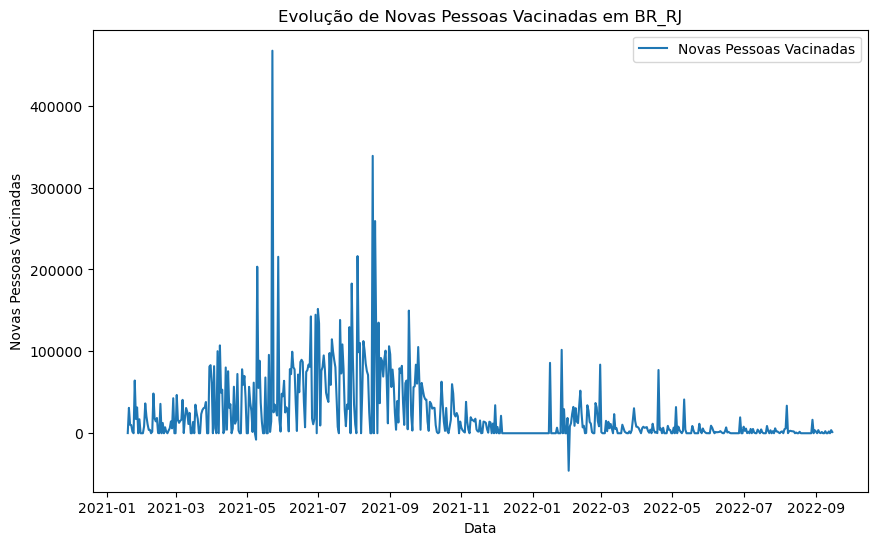

In [95]:
# Filtrar dados para uma localização específica (ex: BR_RJ)
br_rj_vaccinations_df = br_vaccinations_df[br_vaccinations_df['location_key'] == 'BR_RJ']

# Plotar novos casos confirmados ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(br_rj_vaccinations_df['date'], br_rj_vaccinations_df['new_persons_vaccinated'], label='Novas Pessoas Vacinadas')
plt.xlabel('Data')
plt.ylabel('Novas Pessoas Vacinadas')
plt.title('Evolução de Novas Pessoas Vacinadas em BR_RJ')
plt.legend()
plt.show()